<h1>ENB3: Feed forward models</h1><br>
<h2> re-run of ENB2 experiments to look at the effect of re-shuffling the data set</h2>
<br>
<br>
I expect the variation in the accuracy but if the variation is to great and the patterns from ENB2 do not follow on into ENB2 I will look at repeating the experiments on the dataset minus the 13 bending sets, as I suspect these are skewing the reults on such a small dataset.

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

In [2]:
import pre_process as pp

In [3]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [4]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

<h2>Network 3a</h2>

In [5]:
net3a = models.Sequential()
net3a.add(layers.Dense(480, input_shape = (480,6)))
net3a.add(layers.Dense (960, activation = 'relu'))
net3a.add(layers.Dense (480, activation = 'relu'))
net3a.add(layers.Dense (240, activation = 'relu'))
net3a.add(layers.Flatten())
net3a.add(layers.Dense(7, activation = 'sigmoid'))

net3a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_2 (Dense)              (None, 480, 960)          461760    
_________________________________________________________________
dense_3 (Dense)              (None, 480, 480)          461280    
_________________________________________________________________
dense_4 (Dense)              (None, 480, 240)          115440    
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 806407    
Total params: 1,848,247
Trainable params: 1,848,247
Non-trainable params: 0
____________________________________________

In [6]:
net3a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3a = net3a.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 2s 32ms/step - loss: 1.9810 - accuracy: 0.1633 - val_loss: 1.9239 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 1s 23ms/step - loss: 1.8681 - accuracy: 0.2041 - val_loss: 1.8972 - val_accuracy: 0.3158
Epoch 3/11
49/49 [==============================] - 1s 24ms/step - loss: 1.7533 - accuracy: 0.4694 - val_loss: 1.7653 - val_accuracy: 0.2632
Epoch 4/11
49/49 [==============================] - 1s 27ms/step - loss: 1.5499 - accuracy: 0.4694 - val_loss: 1.4858 - val_accuracy: 0.1579
Epoch 5/11
49/49 [==============================] - 1s 22ms/step - loss: 1.4408 - accuracy: 0.3673 - val_loss: 1.5007 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 1s 29ms/step - loss: 1.1898 - accuracy: 0.5102 - val_loss: 1.4441 - val_accuracy: 0.3158
Epoch 7/11
49/4

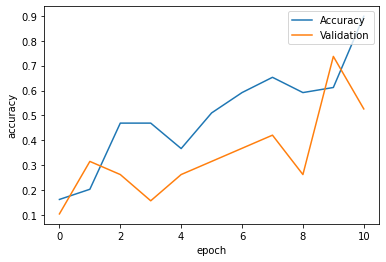

In [7]:
plt.plot(history3a.history['accuracy'])
plt.plot(history3a.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

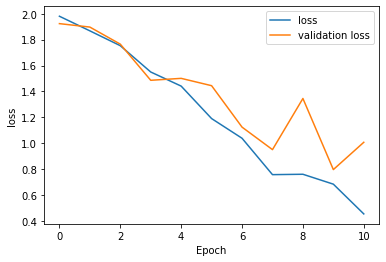

In [8]:
plt.plot(history3a.history['loss'])
plt.plot(history3a.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [9]:
net3a.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 8ms/step


[0.7559342384338379, 0.7058823704719543]

<h2> net3b</h2>

In [10]:
net3b = models.Sequential()
net3b.add(layers.Dense(480, input_shape = (480,6)))
net3b.add(layers.Dense (480, activation = 'relu'))
net3b.add(layers.Dense (240, activation = 'relu'))
net3b.add(layers.Flatten())
net3b.add(layers.Dense(7, activation = 'sigmoid'))

net3b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_7 (Dense)              (None, 480, 480)          230880    
_________________________________________________________________
dense_8 (Dense)              (None, 480, 240)          115440    
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 806407    
Total params: 1,156,087
Trainable params: 1,156,087
Non-trainable params: 0
_________________________________________________________________


In [11]:
net3b.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3b = net3b.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 15ms/step - loss: 1.9927 - accuracy: 0.2041 - val_loss: 1.9525 - val_accuracy: 0.1579
Epoch 2/11
49/49 [==============================] - 0s 9ms/step - loss: 1.8466 - accuracy: 0.3061 - val_loss: 1.8221 - val_accuracy: 0.0000e+00
Epoch 3/11
49/49 [==============================] - 0s 10ms/step - loss: 1.7166 - accuracy: 0.2041 - val_loss: 1.7900 - val_accuracy: 0.0526
Epoch 4/11
49/49 [==============================] - 0s 9ms/step - loss: 1.5339 - accuracy: 0.3265 - val_loss: 1.4654 - val_accuracy: 0.2105
Epoch 5/11
49/49 [==============================] - 0s 9ms/step - loss: 1.1998 - accuracy: 0.4694 - val_loss: 1.1389 - val_accuracy: 0.3684
Epoch 6/11
49/49 [==============================] - 1s 10ms/step - loss: 1.0196 - accuracy: 0.4694 - val_loss: 1.1205 - val_accuracy: 0.5789
Epoch 7/11
49/49 [==============================] - 0s 8ms/step - loss: 0.9468 - accuracy: 0.5510 - val_loss:

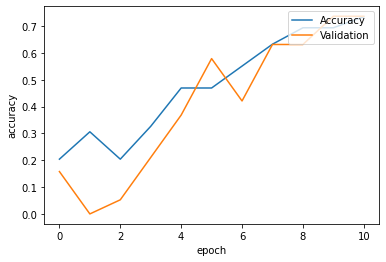

In [12]:
plt.plot(history3b.history['accuracy'])
plt.plot(history3b.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

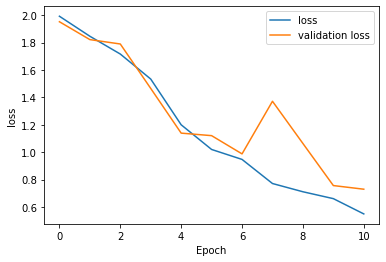

In [13]:
plt.plot(history3b.history['loss'])
plt.plot(history3b.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [14]:
net3b.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 5ms/step


[0.803408145904541, 0.7058823704719543]

<h2> net3c</h2>

In [15]:
net3c = models.Sequential()
net3c.add(layers.Dense(480, input_shape = (480,6)))
net3c.add(layers.Dense (960, activation = 'relu'))
net3c.add(layers.Dense (960, activation = 'relu'))
net3c.add(layers.Dense (480, activation = 'relu'))
net3c.add(layers.Flatten())
net3c.add(layers.Dense(7, activation = 'sigmoid'))

net3c.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_11 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
dense_12 (Dense)             (None, 480, 960)          922560    
_________________________________________________________________
dense_13 (Dense)             (None, 480, 480)          461280    
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 1612807   
Total params: 3,461,767
Trainable params: 3,461,767
Non-trainable params: 0
____________________________________________

In [16]:
net3c.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3c = net3c.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 2s 49ms/step - loss: 2.1617 - accuracy: 0.1429 - val_loss: 1.9883 - val_accuracy: 0.0000e+00
Epoch 2/11
49/49 [==============================] - 2s 37ms/step - loss: 1.8337 - accuracy: 0.1429 - val_loss: 1.9064 - val_accuracy: 0.0000e+00
Epoch 3/11
49/49 [==============================] - 2s 41ms/step - loss: 1.7319 - accuracy: 0.2653 - val_loss: 1.8151 - val_accuracy: 0.0000e+00
Epoch 4/11
49/49 [==============================] - 2s 46ms/step - loss: 1.5390 - accuracy: 0.3061 - val_loss: 1.3125 - val_accuracy: 0.3158
Epoch 5/11
49/49 [==============================] - 2s 50ms/step - loss: 1.2820 - accuracy: 0.4694 - val_loss: 1.7629 - val_accuracy: 0.0000e+00
Epoch 6/11
49/49 [==============================] - 3s 53ms/step - loss: 1.3185 - accuracy: 0.3469 - val_loss: 1.9324 - val_accuracy: 0.1579
Epoch 7/11
49/49 [==============================] - 2s 46ms/step - loss: 1.2843 - accuracy: 0.

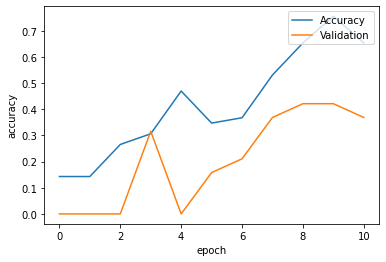

In [17]:
plt.plot(history3c.history['accuracy'])
plt.plot(history3c.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

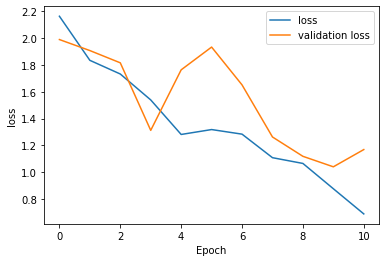

In [18]:
plt.plot(history3c.history['loss'])
plt.plot(history3c.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [19]:
net3c.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 20ms/step


[0.7110283374786377, 0.6470588445663452]

<h1> net3d</h1>

In [20]:
net3d = models.Sequential()
net3d.add(layers.Dense(480, input_shape = (480,6)))
net3d.add(layers.Dense (480, activation = 'relu'))
net3d.add(layers.Flatten())
net3d.add(layers.Dense(7, activation = 'sigmoid'))

net3d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_16 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 1612807   
Total params: 1,847,047
Trainable params: 1,847,047
Non-trainable params: 0
_________________________________________________________________


In [21]:
net3d.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3d = net3d.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 13ms/step - loss: 2.1612 - accuracy: 0.1633 - val_loss: 2.2697 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 0s 7ms/step - loss: 1.8240 - accuracy: 0.2041 - val_loss: 1.7594 - val_accuracy: 0.1579
Epoch 3/11
49/49 [==============================] - 0s 8ms/step - loss: 1.6233 - accuracy: 0.4286 - val_loss: 1.5191 - val_accuracy: 0.6316
Epoch 4/11
49/49 [==============================] - 0s 7ms/step - loss: 1.4630 - accuracy: 0.5306 - val_loss: 1.3950 - val_accuracy: 0.2105
Epoch 5/11
49/49 [==============================] - 0s 7ms/step - loss: 1.1524 - accuracy: 0.4898 - val_loss: 1.5754 - val_accuracy: 0.2105
Epoch 6/11
49/49 [==============================] - 0s 6ms/step - loss: 1.0873 - accuracy: 0.4286 - val_loss: 1.2563 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 0s 7ms/step - loss: 0.9286 - accuracy: 0.5714 - val_loss: 1.347

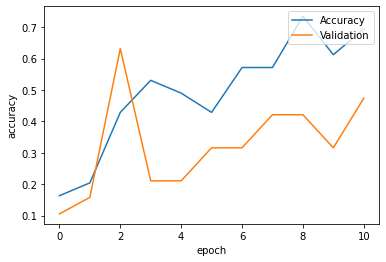

In [22]:
plt.plot(history3d.history['accuracy'])
plt.plot(history3d.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

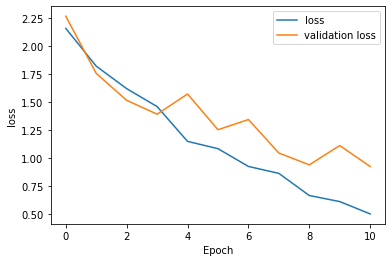

In [23]:
plt.plot(history3d.history['loss'])
plt.plot(history3d.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [24]:
net3d.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 3ms/step


[0.6633622646331787, 0.6470588445663452]

<h3>65% acc</h3>

<h1>net3e</h1>

In [25]:
net3e = models.Sequential()
net3e.add(layers.Dense(480, input_shape = (480,6)))
net3e.add(layers.Dense (480, activation = 'relu'))
net3e.add(layers.Dense (480, activation = 'relu'))
net3e.add(layers.Flatten())
net3e.add(layers.Dense(7, activation = 'sigmoid'))

net3e.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_19 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_20 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 1612807   
Total params: 2,077,927
Trainable params: 2,077,927
Non-trainable params: 0
_________________________________________________________________


In [26]:
net3e.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3e = net3e.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 18ms/step - loss: 2.2074 - accuracy: 0.1020 - val_loss: 2.1405 - val_accuracy: 0.0000e+00
Epoch 2/11
49/49 [==============================] - 1s 12ms/step - loss: 1.8024 - accuracy: 0.2041 - val_loss: 1.8013 - val_accuracy: 0.0000e+00
Epoch 3/11
49/49 [==============================] - 1s 11ms/step - loss: 1.6450 - accuracy: 0.3265 - val_loss: 1.7085 - val_accuracy: 0.2105
Epoch 4/11
49/49 [==============================] - 1s 12ms/step - loss: 1.3749 - accuracy: 0.5510 - val_loss: 1.3731 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 1s 12ms/step - loss: 1.1756 - accuracy: 0.3265 - val_loss: 1.4195 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 1s 12ms/step - loss: 1.1762 - accuracy: 0.3878 - val_loss: 1.4741 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 1s 12ms/step - loss: 0.9390 - accuracy: 0.4898 - v

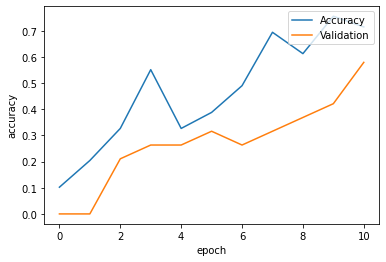

In [27]:
plt.plot(history3e.history['accuracy'])
plt.plot(history3e.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

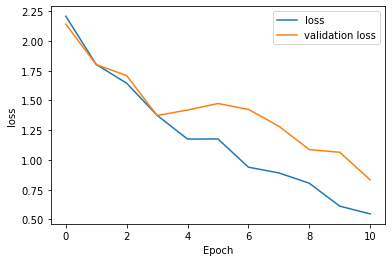

In [28]:
plt.plot(history3e.history['loss'])
plt.plot(history3e.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [29]:
net3e.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 4ms/step


[0.6537506580352783, 0.6470588445663452]

<h1>net3f</h1>

In [30]:
net3f = models.Sequential()
net3f.add(layers.Dense(480, input_shape = (480,6)))
net3f.add(layers.Dense (480, activation = 'relu'))
net3f.add(layers.Dense (480, activation = 'relu'))
net3f.add(layers.Dense (480, activation = 'relu'))
net3f.add(layers.Flatten())
net3f.add(layers.Dense(7, activation = 'sigmoid'))

net3f.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_23 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_24 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_25 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_6 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 1612807   
Total params: 2,308,807
Trainable params: 2,308,807
Non-trainable params: 0
____________________________________________

In [31]:
net3f.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3f = net3f.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 25ms/step - loss: 2.0369 - accuracy: 0.1837 - val_loss: 2.1750 - val_accuracy: 0.0000e+00
Epoch 2/11
49/49 [==============================] - 1s 16ms/step - loss: 1.8549 - accuracy: 0.2041 - val_loss: 1.8867 - val_accuracy: 0.0000e+00
Epoch 3/11
49/49 [==============================] - 1s 18ms/step - loss: 1.7240 - accuracy: 0.2245 - val_loss: 1.6507 - val_accuracy: 0.2632
Epoch 4/11
49/49 [==============================] - 1s 18ms/step - loss: 1.5398 - accuracy: 0.5102 - val_loss: 1.3720 - val_accuracy: 0.3158
Epoch 5/11
49/49 [==============================] - 1s 17ms/step - loss: 1.2388 - accuracy: 0.4898 - val_loss: 1.4205 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 1s 16ms/step - loss: 1.2858 - accuracy: 0.5510 - val_loss: 1.3231 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 1s 19ms/step - loss: 0.9762 - accuracy: 0.5306 - v

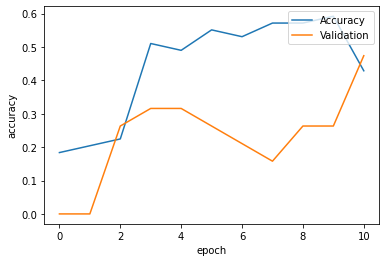

In [32]:
plt.plot(history3f.history['accuracy'])
plt.plot(history3f.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

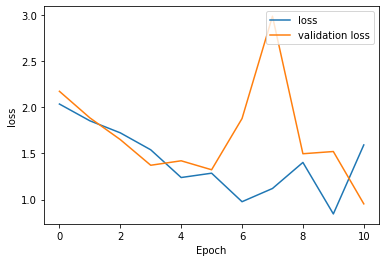

In [33]:
plt.plot(history3f.history['loss'])
plt.plot(history3f.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [34]:
net3f.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 5ms/step


[0.9326204061508179, 0.529411792755127]

<h1>net3g</h1>

In [35]:
net3g = models.Sequential()
net3g.add(layers.Dense(480, input_shape = (480,6)))
net3g.add(layers.Dense (480, activation = 'relu'))
net3g.add(layers.Dense (240, activation = 'relu'))
net3g.add(layers.Dense (120, activation = 'relu'))
net3g.add(layers.Flatten())
net3g.add(layers.Dense(7, activation = 'sigmoid'))

net3g.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_28 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_29 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
dense_30 (Dense)             (None, 480, 120)          28920     
_________________________________________________________________
flatten_7 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 7)                 403207    
Total params: 781,807
Trainable params: 781,807
Non-trainable params: 0
________________________________________________

In [36]:
net3g.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3g = net3g.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 19ms/step - loss: 1.9703 - accuracy: 0.2041 - val_loss: 2.0284 - val_accuracy: 0.0000e+00
Epoch 2/11
49/49 [==============================] - 0s 9ms/step - loss: 1.8430 - accuracy: 0.2041 - val_loss: 2.0170 - val_accuracy: 0.0000e+00
Epoch 3/11
49/49 [==============================] - 1s 11ms/step - loss: 1.7969 - accuracy: 0.1429 - val_loss: 1.8344 - val_accuracy: 0.0000e+00
Epoch 4/11
49/49 [==============================] - 1s 12ms/step - loss: 1.7039 - accuracy: 0.2041 - val_loss: 1.6619 - val_accuracy: 0.1579
Epoch 5/11
49/49 [==============================] - 0s 9ms/step - loss: 1.6402 - accuracy: 0.3673 - val_loss: 1.5087 - val_accuracy: 0.1579
Epoch 6/11
49/49 [==============================] - 0s 10ms/step - loss: 1.3877 - accuracy: 0.3265 - val_loss: 1.7744 - val_accuracy: 0.1053
Epoch 7/11
49/49 [==============================] - 0s 10ms/step - loss: 1.4099 - accuracy: 0.2857 -

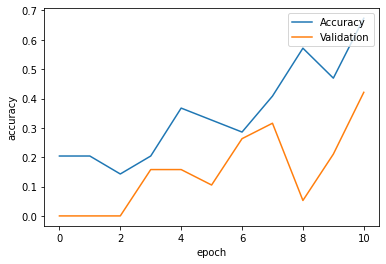

In [37]:
plt.plot(history3g.history['accuracy'])
plt.plot(history3g.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

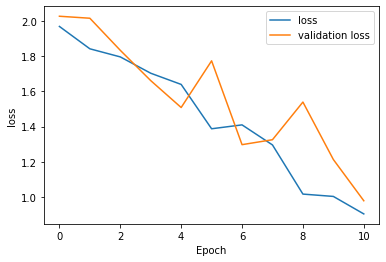

In [38]:
plt.plot(history3g.history['loss'])
plt.plot(history3g.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [39]:
net3g.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 4ms/step


[1.1130139827728271, 0.3529411852359772]

<h1>net3H</h1>

In [40]:
net3h = models.Sequential()
net3h.add(layers.Dense(480, input_shape = (480,6)))
net3h.add(layers.Dense (960, activation = 'relu'))
net3h.add(layers.Dense (480, activation = 'relu'))
net3h.add(layers.Flatten())
net3h.add(layers.Dense(7, activation = 'sigmoid'))

net3h.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_33 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
dense_34 (Dense)             (None, 480, 480)          461280    
_________________________________________________________________
flatten_8 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 1612807   
Total params: 2,539,207
Trainable params: 2,539,207
Non-trainable params: 0
_________________________________________________________________


In [41]:
net3h.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3h = net3h.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 29ms/step - loss: 2.2129 - accuracy: 0.1020 - val_loss: 2.1367 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 1s 20ms/step - loss: 1.8797 - accuracy: 0.3061 - val_loss: 1.8269 - val_accuracy: 0.1053
Epoch 3/11
49/49 [==============================] - 1s 25ms/step - loss: 1.7034 - accuracy: 0.1837 - val_loss: 1.7447 - val_accuracy: 0.0000e+00
Epoch 4/11
49/49 [==============================] - 1s 24ms/step - loss: 1.4120 - accuracy: 0.2857 - val_loss: 1.3243 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 1s 24ms/step - loss: 1.3605 - accuracy: 0.4490 - val_loss: 1.3509 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 1s 26ms/step - loss: 1.3023 - accuracy: 0.3469 - val_loss: 1.3337 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 1s 22ms/step - loss: 0.9990 - accuracy: 0.4490 - val_l

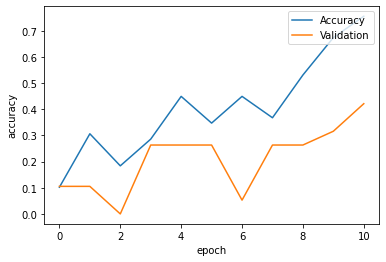

In [42]:
plt.plot(history3h.history['accuracy'])
plt.plot(history3h.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

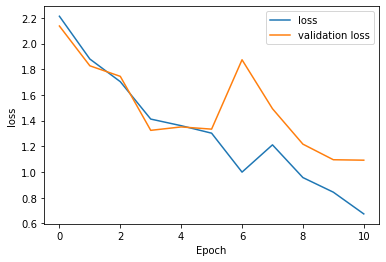

In [43]:
plt.plot(history3h.history['loss'])
plt.plot(history3h.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [44]:
net3h.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 7ms/step


[0.9898457527160645, 0.47058823704719543]

<h1>net3I</h1>

In [45]:
net3i = models.Sequential()
net3i.add(layers.Dense(480, input_shape = (480,6)))
net3i.add(layers.Dense (240, activation = 'relu'))
net3i.add(layers.Flatten())
net3i.add(layers.Dense(7, activation = 'sigmoid'))

net3i.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_37 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_9 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 806407    
Total params: 925,207
Trainable params: 925,207
Non-trainable params: 0
_________________________________________________________________


In [46]:
net3i.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3i = net3i.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 11ms/step - loss: 2.3608 - accuracy: 0.0204 - val_loss: 2.0290 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 0s 3ms/step - loss: 1.8420 - accuracy: 0.2041 - val_loss: 1.8668 - val_accuracy: 0.1053
Epoch 3/11
49/49 [==============================] - 0s 4ms/step - loss: 1.7717 - accuracy: 0.2041 - val_loss: 1.7695 - val_accuracy: 0.2105
Epoch 4/11
49/49 [==============================] - 0s 4ms/step - loss: 1.6649 - accuracy: 0.4286 - val_loss: 1.6276 - val_accuracy: 0.0000e+00
Epoch 5/11
49/49 [==============================] - 0s 4ms/step - loss: 1.4885 - accuracy: 0.3265 - val_loss: 1.5513 - val_accuracy: 0.0526
Epoch 6/11
49/49 [==============================] - 0s 4ms/step - loss: 1.2783 - accuracy: 0.3061 - val_loss: 1.4902 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 0s 4ms/step - loss: 1.1086 - accuracy: 0.5102 - val_loss: 1

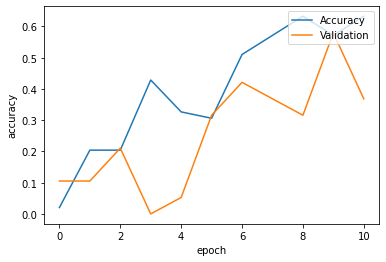

In [47]:
plt.plot(history3i.history['accuracy'])
plt.plot(history3i.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

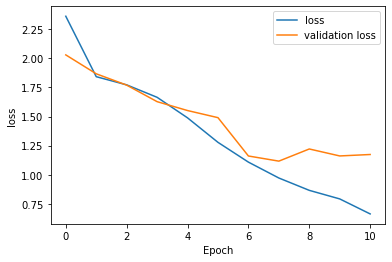

In [48]:
plt.plot(history3i.history['loss'])
plt.plot(history3i.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [49]:
net3i.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 1ms/step


[1.144841194152832, 0.4117647111415863]

<h1>net3J</h1>

In [50]:
net3j = models.Sequential()
net3j.add(layers.Dense(480, input_shape = (480,6)))
net3j.add(layers.Dense (960, activation = 'relu'))
net3j.add(layers.Flatten())
net3j.add(layers.Dense(7, activation = 'sigmoid'))

net3j.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_40 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
flatten_10 (Flatten)         (None, 460800)            0         
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 3225607   
Total params: 3,690,727
Trainable params: 3,690,727
Non-trainable params: 0
_________________________________________________________________


In [51]:
net3j.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history3j = net3j.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 21ms/step - loss: 2.7057 - accuracy: 0.1633 - val_loss: 2.1027 - val_accuracy: 0.0000e+00
Epoch 2/11
49/49 [==============================] - 1s 14ms/step - loss: 1.8369 - accuracy: 0.2041 - val_loss: 1.8328 - val_accuracy: 0.1579
Epoch 3/11
49/49 [==============================] - 1s 15ms/step - loss: 1.8060 - accuracy: 0.4082 - val_loss: 1.7001 - val_accuracy: 0.2105
Epoch 4/11
49/49 [==============================] - 1s 12ms/step - loss: 1.6083 - accuracy: 0.4490 - val_loss: 1.7120 - val_accuracy: 0.1579
Epoch 5/11
49/49 [==============================] - 1s 13ms/step - loss: 1.3213 - accuracy: 0.2857 - val_loss: 1.4358 - val_accuracy: 0.2105
Epoch 6/11
49/49 [==============================] - 1s 13ms/step - loss: 1.0945 - accuracy: 0.4694 - val_loss: 1.3815 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 1s 13ms/step - loss: 1.0304 - accuracy: 0.5510 - val_l

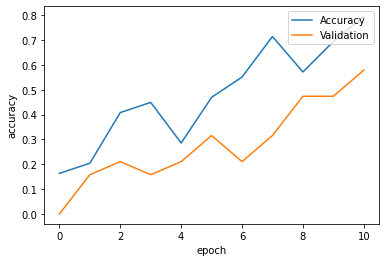

In [52]:
plt.plot(history3j.history['accuracy'])
plt.plot(history3j.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

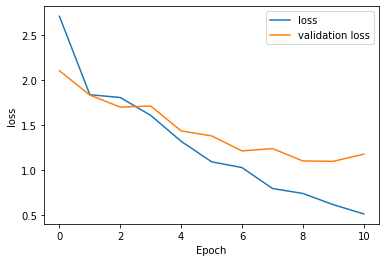

In [53]:
plt.plot(history3j.history['loss'])
plt.plot(history3j.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [54]:
net3j.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 4ms/step


[1.0021864175796509, 0.529411792755127]